# Import necessary dependencies

In [279]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

# Prepare data and datasets

In [309]:
classes = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"
         ,"K", "L", "M", "N", "O", "P", "Q", "R", "S", "T",
          "U", "V", "W", "X", "Y", "Z", "nothing", "space", "del"]

In [310]:
train_path="C:/Users/daba1/asl/asl_alphabet_train/asl_alphabet_train"
test_path="C:/Users/daba1/asl/asl_alphabet_test/asl_alphabet_test"
valid_path="C:/Users/daba1/asl/asl_alphabet_validation/asl_alphabet_validation"

In [328]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v3.preprocess_input) \
    .flow_from_directory(color_mode = "grayscale", directory=train_path, target_size=(64, 64), classes=classes, batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v3.preprocess_input) \
    .flow_from_directory(color_mode = "grayscale",directory=valid_path, target_size=(64, 64), classes=classes, batch_size=10, shuffle=False)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v3.preprocess_input) \
    .flow_from_directory(color_mode = "grayscale",directory=valid_path, target_size=(64, 64), classes=classes, batch_size=10)

Found 87000 images belonging to 29 classes.
Found 2800 images belonging to 29 classes.
Found 2800 images belonging to 29 classes.


In [214]:
imgs, labels = next(train_batches)

In [215]:
#this function will plot images in the form of a grid with 1 row and 10 column where images are place
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

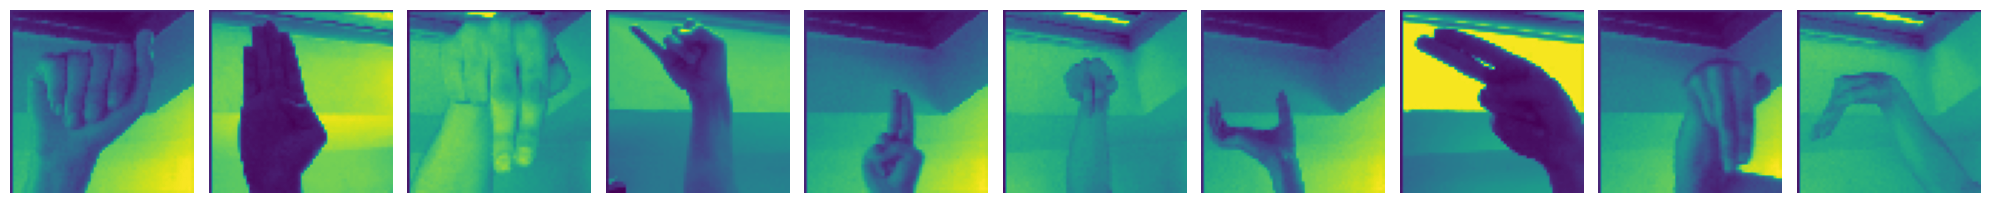

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1.]]


In [216]:
#image after preprocessing
plotImages(imgs)
print(labels)

# Model

In [217]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation=tf.nn.relu))
model.add(Dense(29, activation='softmax'))

In [338]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 62, 62, 16)        160       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 31, 31, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 flatten_13 (Flatten)        (None, 6272)              0         
                                                                 
 dense_26 (Dense)            (None, 512)             

In [219]:
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train

In [313]:
history = model.fit(x=train_batches, validation_data=valid_batches, epochs=10)

Epoch 1/10
8700/8700 [==============================] - 1253s 144ms/step - loss: 0.1478 - accuracy: 0.9834 - val_loss: 0.1038 - val_accuracy: 0.9854
Epoch 2/10
8700/8700 [==============================] - 400s 46ms/step - loss: 0.1444 - accuracy: 0.9849 - val_loss: 0.1699 - val_accuracy: 0.9793
Epoch 3/10
8700/8700 [==============================] - 399s 46ms/step - loss: 0.1725 - accuracy: 0.9852 - val_loss: 0.7388 - val_accuracy: 0.9654
Epoch 4/10
8700/8700 [==============================] - 404s 46ms/step - loss: 0.2089 - accuracy: 0.9852 - val_loss: 0.0694 - val_accuracy: 0.9950
Epoch 5/10
8700/8700 [==============================] - 401s 46ms/step - loss: 0.1818 - accuracy: 0.9877 - val_loss: 0.4911 - val_accuracy: 0.9775
Epoch 6/10
8700/8700 [==============================] - 398s 46ms/step - loss: 0.1897 - accuracy: 0.9877 - val_loss: 0.2788 - val_accuracy: 0.9925
Epoch 7/10
8700/8700 [==============================] - 405s 47ms/step - loss: 0.1967 - accuracy: 0.9882 - val_loss:

# Export model

In [427]:
if os.path.isfile('C:/Users/daba1/home/asl_model.h5') is False:
    model.save('C:/Users/daba1/home/asl_model.h5')

# Model performance

# 1. Check one image from external file

In [406]:
import cv2
import imghdr
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
from PIL import Image
import tensorflow as tf

In [420]:
image_path = 'C:/Users/daba1/testF.png'

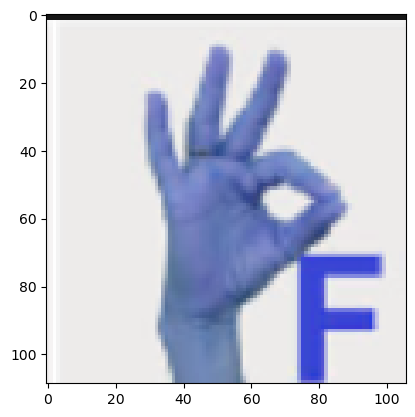

In [421]:
# show image before preprocessing
img = cv2.imread(image_path)
plt.imshow(img)
plt.show()

In [422]:
# process image
image = Image.open(image_path).convert('L')  
plt.show()
image = image.resize((64, 64))

# Preprocess the image
preprocessed_image = img_to_array(image)
preprocessed_image = tf.keras.applications.mobilenet_v3.preprocess_input(preprocessed_image)

# Expand dimensions to match the model input shape
preprocessed_image = np.expand_dims(preprocessed_image, axis=0)

In [423]:
# model prediction
predictions = model.predict(preprocessed_image)

1/1 [==============================] - 0s 26ms/step


Predicted class: 5
confidency:  0.99967325


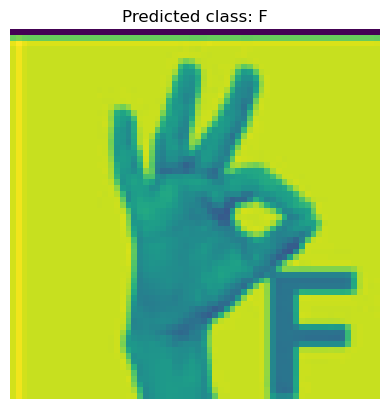

In [424]:
# print the result
predicted_class = np.argmax(predictions)
print("Predicted class:", predicted_class)
print("confidency: ", predictions[0].max())
plt.imshow(image)
plt.axis('off')
plt.title("Predicted class: " + classes[predicted_class])
plt.show()

# 2. Check model with test

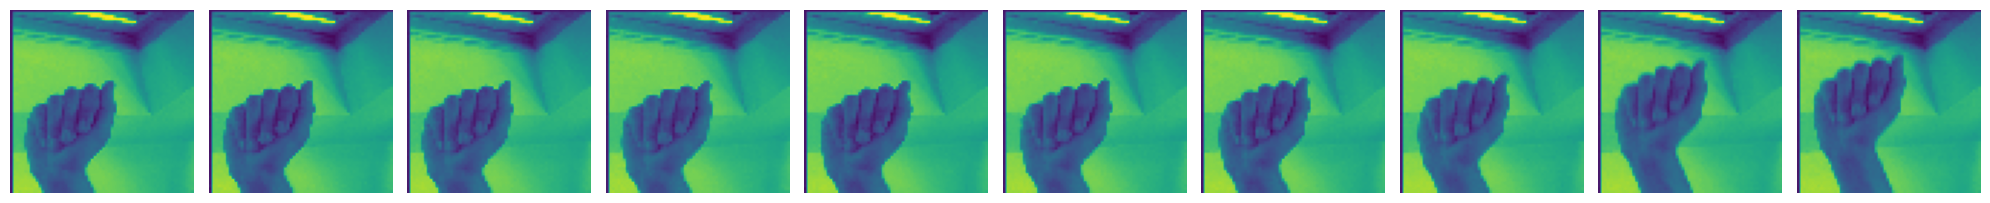

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]


In [329]:
#test images
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [330]:
test_batches.classes

array([ 0,  0,  0, ..., 28, 28, 28])

In [331]:
predictions = model.predict(x=test_batches)

280/280 [==============================] - 5s 18ms/step


In [332]:
np.round(predictions)

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [333]:
test_batches.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25,
 'nothing': 26,
 'space': 27,
 'del': 28}

In [335]:
score = model.evaluate(x=test_batches, verbose =  0)
print('test loss:', score[0])
print('test accuracy', score[1])

test loss: 0.23826812207698822
test accuracy 0.9853571653366089


In [325]:
import pandas as pd

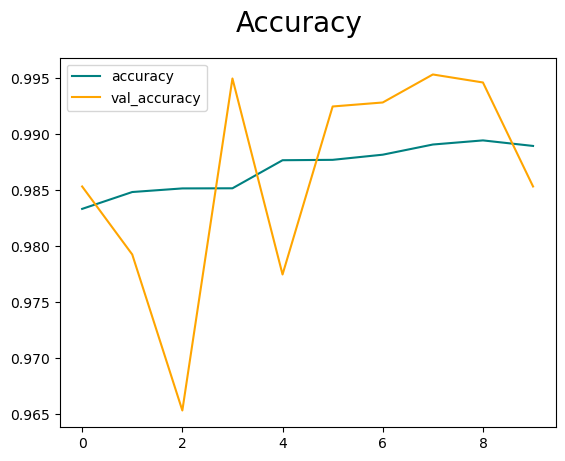

In [336]:

#Plot Performance
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


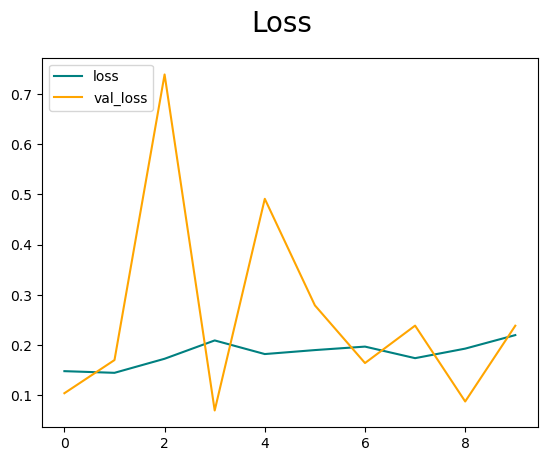

In [398]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()



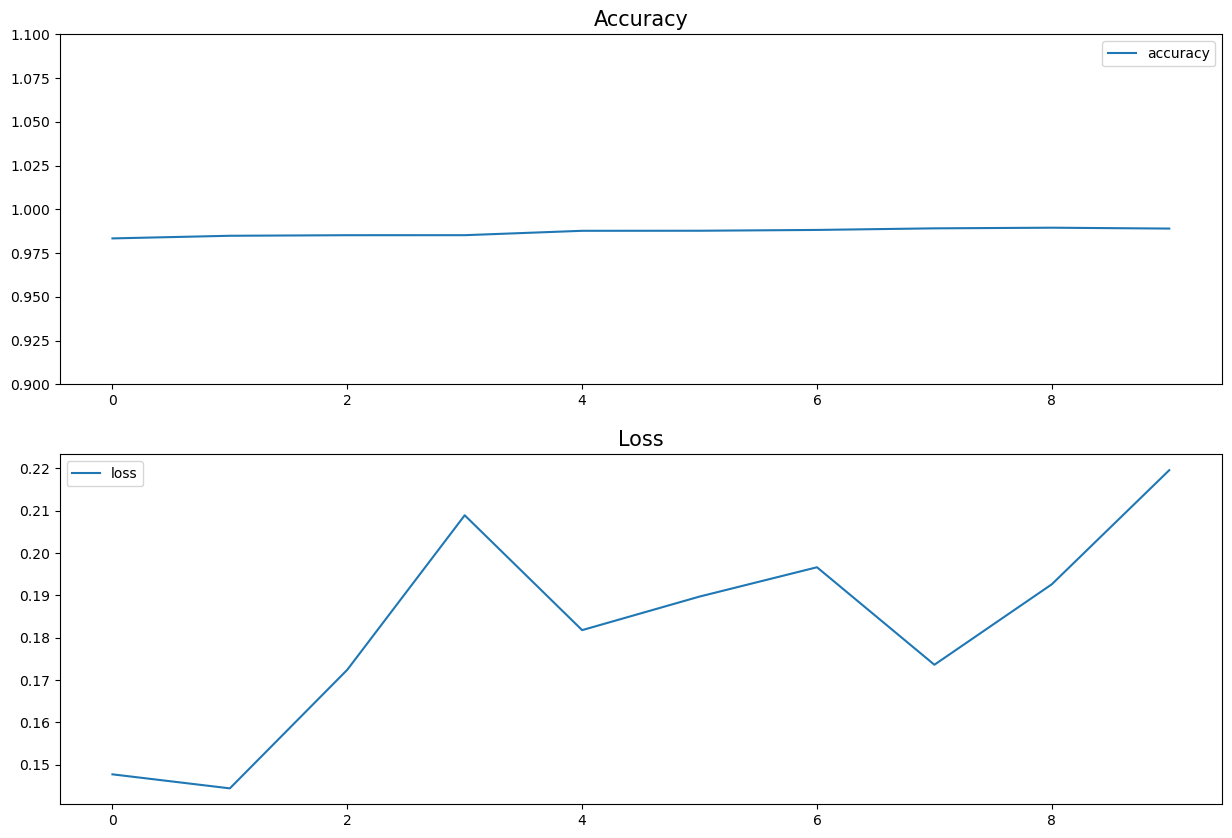

In [414]:


fig, axes = plt.subplots(2, 1, figsize=(15, 10))
ax = axes.flat

pd.DataFrame(history.history)[['accuracy']].plot(ax=ax[0])
ax[0].set_title("Accuracy", fontsize = 15)
ax[0].set_ylim(0.9,1.1)

pd.DataFrame(history.history)[['loss']].plot(ax=ax[1])
ax[1].set_title("Loss", fontsize = 15)
plt.show()

